In [50]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import sklearn.linear_model
import warnings
import json
import seaborn as sns
warnings.filterwarnings('ignore')



# Logistic Regression Classifier

In [91]:
#get data
data_downSampling = np.genfromtxt('dataset_down_sampling.csv', delimiter=",")
data_upSampling = np.genfromtxt('dataset_up_sampling.csv', delimiter=",")


#functions
def splitData(data):
    
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data[:, :-1], 
                                                                                    data[:,-1],
                                                                                    train_size=0.8, random_state=0)

    return X_train , y_train, X_test, y_test

def evaluateModel(X_train,y_train,X_test,y_test,model):
    y_pred = model.predict(X_train)
    trainA = sklearn.metrics.accuracy_score(y_train,y_pred)*100
    print("Training accuracy: %.3f%%"%trainA)
    y_pred2 = model.predict(X_test)
    testA = sklearn.metrics.accuracy_score(y_test,y_pred2)*100
    print("Testing accuracy: %.3f%%"%testA)
    precision = sklearn.metrics.precision_score(y_test, y_pred2)*100
    recall = sklearn.metrics.recall_score(y_test, y_pred2)*100
    roc = roc_auc_score(y_test,y_pred2)*100
    print("Precision: %.3f%%"%precision)
    print("Recall: %.3f%%"%recall)
    print("ROC: %.3f%%"%roc)
    
    return trainA, testA, precision, recall, roc

#Grid search for logistic regression(max_iter & C)
def lrGridSearch(solver,cv,X_train,y_train):

    lr = sklearn.linear_model.LogisticRegression(random_state=0,solver=solver)
    c = [0.001,0.01,0.1,1,10]
    max_iter = [50,100,200,500]
    param_grid = {'C' : c, 'max_iter' : max_iter}
    
    if cv==1:
        cv = [(slice(None), slice(None))]#no cv
    
    gridSearch = sklearn.model_selection.GridSearchCV(lr,param_grid=param_grid,n_jobs=2, verbose=1,cv=cv)
    gridSearch.fit(X_train,y_train)
    
    return gridSearch

def visualizeBest_Solver_CV(solvers,cv,scores,a,b):
    
    plt.ylim(a,b)
    plt.title("Best Cross Validation & Solver")
    plt.xlabel("CV")
    plt.ylabel("Val_Score")
    
    color=['k','y','g','b','r']
    
    i = 0
    for s in solvers:
        plt.plot(cv,scores[i],color[i],marker="o",label=solvers[i])
        i+=1
    plt.legend();

    
def plotConfusionMatrix(X_test,y_test,model,title):
    
    y_pred = model.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)    
    
    ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.title(title)
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])
    plt.show()

#feature analysis
def featurePlot(labels,scores,title,color):
    
    plt.figure(figsize=(16, 8))
    plt.bar(labels,scores, color=color, edgecolor='black')
    plt.title(title)
    plt.xticks(range(len(labels)), labels, rotation='vertical')
    plt.ylim(0,0.2)
    plt.ylabel('Importance %')

# Using Up Sampled data

In [38]:
#upSampling data split
X_train_up , y_train_up, X_test_up, y_test_up = splitData(data_upSampling)

print(X_train_up.shape)
print(X_test_up.shape)


(20072, 11)
(5018, 11)


In [39]:
#uncomment and run only if re-training best estimators(High computation time)
#scores already calculated and saved for quick running 
'''
newtonScr = []
lbfgsScr = []
liblinearScr = []
sagScr=[]
sagaScr=[]

# grid search(max_iter & C) for all combination of solver and CV.
def excecute_Grid_Searches(X_train,y_train):
    
    for i in range(1,8,2):
        lr1 = lrGridSearch("newton-cg",i,X_train, y_train)
        lr2 = lrGridSearch("lbfgs",i,X_train, y_train)
        lr3 = lrGridSearch("liblinear",i,X_train,y_train)
        lr4 = lrGridSearch("sag",i,X_train, y_train)
        lr5 = lrGridSearch("saga",i,X_train, y_train)
    
        newtonScr.append(lr1.best_score_)
        lbfgsScr.append(lr2.best_score_)
        liblinearScr.append(lr3.best_score_)
        sagScr.append(lr4.best_score_)
        sagaScr.append(lr5.best_score_)

excecute_Grid_Searches(X_train_up,y_train_up);

#save to json file for futur quick loading
saveScr = {'newtonScr' : newtonScr, 'lbfgsScr' : lbfgsScr, 'liblinearScr' : liblinearScr , 'sagScr' : sagScr, 'sagaScr' : sagaScr  }
with open('scoreLrUp.json', 'w') as f:
    json.dump(saveScr, f)

'''


Fitting 1 folds for each of 20 candidates, totalling 20 fits
Fitting 1 folds for each of 20 candidates, totalling 20 fits
Fitting 1 folds for each of 20 candidates, totalling 20 fits
Fitting 1 folds for each of 20 candidates, totalling 20 fits
Fitting 1 folds for each of 20 candidates, totalling 20 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 7 folds for each of 20 candidates, totalling 140 fits
Fitting 7 folds fo

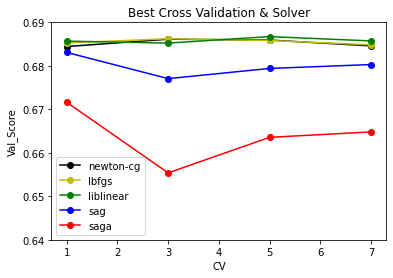

In [40]:
#load result of gridSearch from file
score = None
with open('scoreLrUp.json','r') as f:
    score = json.load(f)


newtonScr = score['newtonScr']
lbfgsScr = score['lbfgsScr']
liblinearScr = score['liblinearScr']
sagScr = score['sagScr']
sagaScr = score['sagaScr']

scores = [newtonScr,lbfgsScr,liblinearScr,sagScr,sagaScr]

# visualize result   
solvers = ['newton-cg','lbfgs','liblinear','sag','saga']
visualizeBest_Solver_CV(solvers,np.arange(1,8,2),scores,0.64,0.69)

In [41]:
cv = [1,3,5,7]
def display_solver_MaxScores():
    print("Max Score lbfgs: %.4f at cv = %i "%(max(lbfgsScr),cv[lbfgsScr.index(max(lbfgsScr))]))
    print("Max Score newton-cg: %.4f at cv = %i "%(max(newtonScr),cv[newtonScr.index(max(newtonScr))]))
    print("Max Score liblinear: %.4f at cv = %i "%(max(liblinearScr),cv[liblinearScr.index(max(liblinearScr))]))
    print("Max Score saga: %.4f at cv = %i "%(max(sagaScr),cv[sagaScr.index(max(sagaScr))]))
    print("Max Score sag: %.4f at cv = %i "%(max(sagScr),cv[sagScr.index(max(sagScr))]))

display_solver_MaxScores()

Max Score lbfgs: 0.6862 at cv = 3 
Max Score newton-cg: 0.6861 at cv = 3 
Max Score liblinear: 0.6867 at cv = 5 
Max Score saga: 0.6716 at cv = 1 
Max Score sag: 0.6831 at cv = 1 


In [43]:
#re-Grid Search for chosen solver as only scores was previosly saved and not the best estimator(too many models to save)
model_lr_Gs = lrGridSearch('lbfgs',1,X_train_up,y_train_up);

Fitting 1 folds for each of 20 candidates, totalling 20 fits


In [44]:
print("Best solver(UpSampling): lbfgs ")
print("Best Parameters of Model:",model_lr_Gs.best_params_,"Score: %.3f"%model_lr_Gs.best_score_)
model_lr = model_lr_Gs.best_estimator_

Best solver(UpSampling): lbfgs 
Best Parameters of Model: {'C': 1, 'max_iter': 200} Score: 0.685


In [45]:
trainA_u,testA_u,precision_u,recall_u,roc_u = evaluateModel(X_train_up,y_train_up,X_test_up,y_test_up,model_lr)

Training accuracy: 68.344%
Testing accuracy: 69.310%
Precision: 71.869%
Recall: 64.376%
ROC: 69.356%


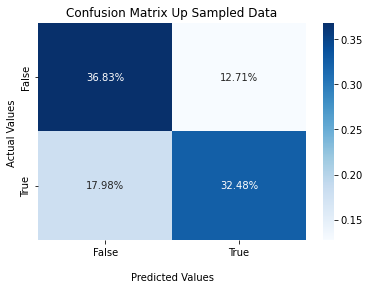

In [54]:
plotConfusionMatrix(X_test_up,y_test_up,model_lr,"Confusion Matrix Up Sampled Data")

# Using Down Sampled Data

In [55]:
#downSampling data split
X_train_down , y_train_down, X_test_down, y_test_down = splitData(data_downSampling)

print(X_train_down.shape)
print(X_test_down.shape)


(6051, 11)
(1513, 11)


In [56]:
#uncomment and run only if re-training best estimators(High computation time)
#scores already calculated and saved for quick running 

'''
newtonScr = []
lbfgsScr = []
liblinearScr = []
sagScr=[]
sagaScr=[]

excecute_Grid_Searches(X_train_down,y_train_down)

#save to json file for futur quick loading
saveScr = {'newtonScr' : newtonScr, 'lbfgsScr' : lbfgsScr, 'liblinearScr' : liblinearScr , 'sagScr' : sagScr, 'sagaScr' : sagaScr  }
with open('scoreLrDown.json', 'w') as f:
    json.dump(saveScr, f)

'''


Fitting 1 folds for each of 20 candidates, totalling 20 fits
Fitting 1 folds for each of 20 candidates, totalling 20 fits
Fitting 1 folds for each of 20 candidates, totalling 20 fits
Fitting 1 folds for each of 20 candidates, totalling 20 fits
Fitting 1 folds for each of 20 candidates, totalling 20 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 7 folds for each of 20 candidates, totalling 140 fits
Fitting 7 folds fo

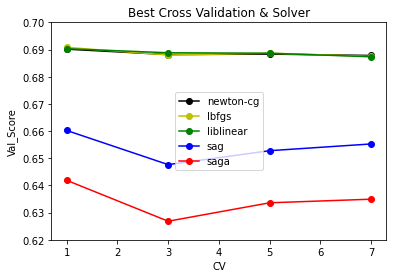

In [57]:
#load score from file
score = None
with open('scoreLrDown.json','r') as f:
    score = json.load(f)

newtonScr = score['newtonScr']
lbfgsScr = score['lbfgsScr']
liblinearScr = score['liblinearScr']
sagScr = score['sagScr']
sagaScr = score['sagaScr']

scores = [newtonScr,lbfgsScr,liblinearScr,sagScr,sagaScr]


# visualize result   
solvers = ['newton-cg','lbfgs','liblinear','sag','saga']
visualizeBest_Solver_CV(solvers,np.arange(1,8,2),scores,0.62,0.70)

In [58]:
display_solver_MaxScores()

Max Score lbfgs: 0.6908 at cv = 1 
Max Score newton-cg: 0.6901 at cv = 1 
Max Score liblinear: 0.6903 at cv = 1 
Max Score saga: 0.6419 at cv = 1 
Max Score sag: 0.6602 at cv = 1 


In [59]:
#re Grid Search of chosen model
model_lr_Gs = lrGridSearch('lbfgs',1,X_train_down,y_train_down);

Fitting 1 folds for each of 20 candidates, totalling 20 fits


In [60]:
print("Best Solver(downSampling): lbfgs ")
print("Best Parameters of Model:",model_lr_Gs.best_params_,"Score: %.3f"%model_lr_Gs.best_score_)
model_lr2 = model_lr_Gs.best_estimator_

Best Solver(downSampling): lbfgs 
Best Parameters of Model: {'C': 1, 'max_iter': 200} Score: 0.691


In [61]:
trainA_d,testA_d,precision_d,recall_d,roc_d = evaluateModel(X_train_down,y_train_down,X_test_down,y_test_down,model_lr2)

Training accuracy: 69.079%
Testing accuracy: 68.672%
Precision: 69.535%
Recall: 65.646%
ROC: 68.650%


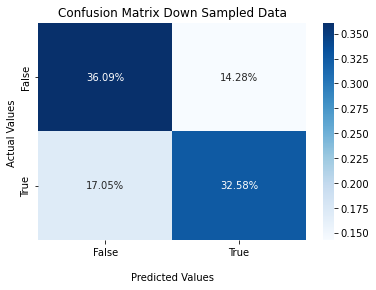

In [62]:
plotConfusionMatrix(X_test_down,y_test_down,model_lr2,"Confusion Matrix Down Sampled Data")

# Performance Visualization 

Text(0, 0.5, 'ROC %')

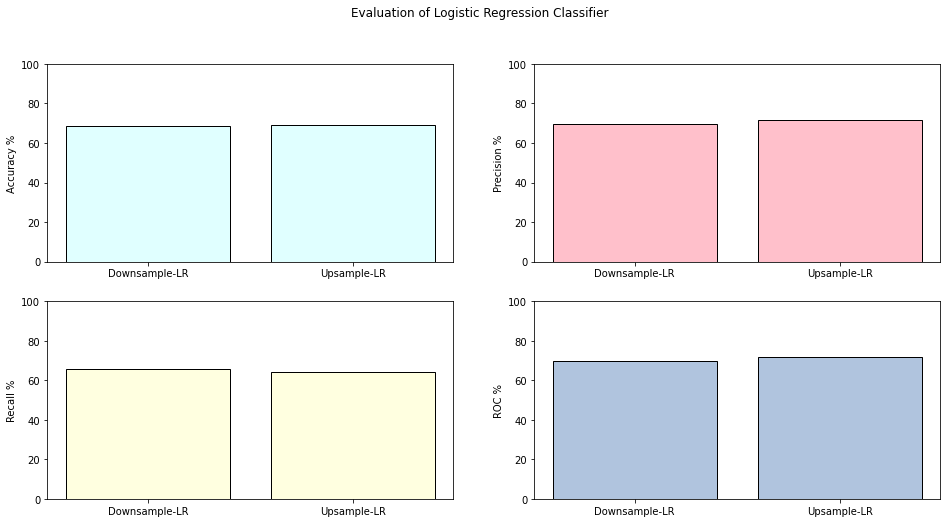

In [71]:
#Performance evaluation
labels = ['Downsample-LR', 'Upsample-LR']
accuracies = [testA_d,testA_u]
precision = [precision_d,precision_u]
recall = [recall_d,recall_u]
roc = [roc_d,roc_u]

plt.figure(figsize=(16, 8))
plt.suptitle('Evaluation of Logistic Regression Classifier');
plt.subplot(2,2,1)
plt.bar(labels,accuracies, color='lightcyan', edgecolor='black')
plt.ylim(0,100)
plt.ylabel('Accuracy %')

plt.subplot(2,2,2)
plt.bar(labels,precision, color='pink',  edgecolor='black')
plt.ylim(0,100)
plt.ylabel('Precision %')

plt.subplot(2,2,3)
plt.bar(labels,recall,color='lightyellow',  edgecolor='black')
plt.ylim(0,100)
plt.ylabel('Recall %')

plt.subplot(2,2,4)
plt.bar(labels,precision, color='lightsteelblue',  edgecolor='black')
plt.ylim(0,100)
plt.ylabel('ROC %')

# Feature Importance Analysis

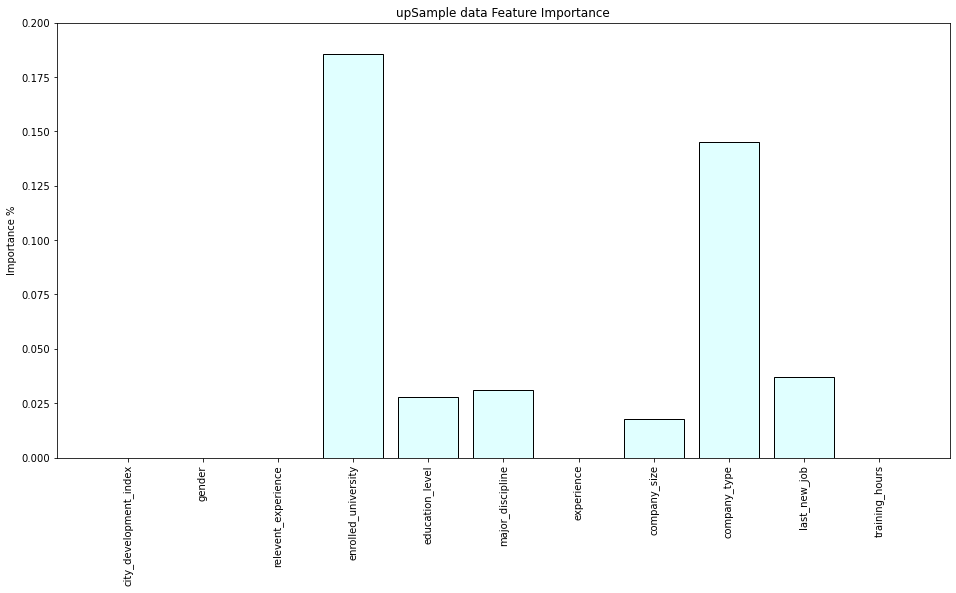

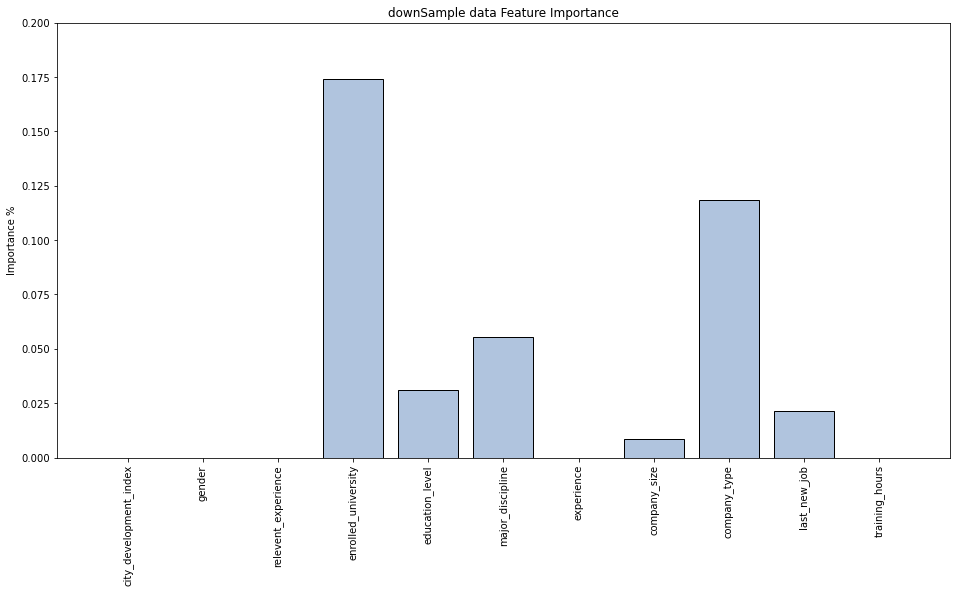

In [94]:
f_importance_up = model_lr.coef_
scores_up = f_importance_up.reshape(-1)

labels = ['city_development_index','gender','relevent_experience','enrolled_university','education_level','major_discipline','experience','company_size','company_type','last_new_job','training_hours']

f_importance_down = model_lr2.coef_
scores_down = f_importance_down.reshape(-1)

featurePlot(labels,scores_up,"upSample data Feature Importance",'lightcyan')
featurePlot(labels,scores_down,"downSample data Feature Importance",'lightsteelblue')